In [1]:
import json
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
folder_path = 'E:/work/data/waze-trafmine/2018/4'

In [3]:
def from_json_folder_to_json_docs(folder_path):
    pathlist = Path(folder_path).glob('**/*.json')
    json_docs = []
    for path in pathlist:
        # because path is object not string
        path_in_str = str(path)
        print('processing file: ' + path_in_str)
        with open(path_in_str, encoding="utf8") as f:
            json_file = json.load(f)
            json_docs.append(json_file)
    print('Done!')
    return json_docs

In [4]:
json_data = from_json_folder_to_json_docs(folder_path)

processing file: E:\work\data\waze-trafmine\2018\4\1-10.json
processing file: E:\work\data\waze-trafmine\2018\4\11-20.json
processing file: E:\work\data\waze-trafmine\2018\4\21-30.json
Done!


In [5]:
first_it = True
for json in json_data:
    #print(json.keys())
    if first_it != True:
        alerts_df.append(pd.DataFrame(json['alerts']), ignore_index=True)
        jams_df.append(pd.DataFrame(json['jams']), ignore_index=True)
    else:
        alerts_df = pd.DataFrame(json['alerts'])
        jams_df = pd.DataFrame(json['jams'])
        first_it = False

In [6]:
alerts_df.head(3)

,alert_subtype_id,alert_type_id,city,confidence,country,jam_uuid,last_seen,location,magvar,publish_date,reliability,report_by_partner,report_description,report_rating,road_type,street,thumbs_up,uuid
0,13.0,4,None,5,CI,None,2018-04-01T03:00:21+00:00,"[-70.646227, -33.635035]",265,2018-04-01T01:02:02+00:00,10,None,None,0,3.0,Ruta 79,0,8271e6bf-fca0-3cad-bac4-6a6959d16b1c
1,4.0,3,Conchalí,0,CI,None,2018-04-01T03:00:21+00:00,"[-70.670608, -33.398605]",56,2018-04-01T02:30:58+00:00,5,None,None,1,2.0,Av. Dorsal,0,e7b8841f-a144-3b7d-b685-05bc447b73fd
2,3.0,3,Ñuñoa,0,CI,None,2018-04-01T03:00:21+00:00,"[-70.575705, -33.469535]",2,2018-04-01T02:31:00+00:00,5,None,None,1,2.0,None,0,e1c149d5-4383-3490-bb2d-550156e3ad51


In [7]:
alerts_df.shape

(115547, 18)

In [8]:
# parse date to datetime object
alerts_df['publish_date_dt'] = pd.to_datetime(alerts_df['publish_date'])

In [9]:
# subsets dataframe
alerts_df.drop(alerts_df.columns.difference(['alert_subtype_id', 'alert_type_id', 'street', 'publish_date_dt']), 1, inplace=True)

In [10]:
# drop duplicates
alerts_df.drop_duplicates(inplace=True)

In [11]:
alerts_df.head(3)

,alert_subtype_id,alert_type_id,street,publish_date_dt
0,13.0,4,Ruta 79,2018-04-01 01:02:02+00:00
1,4.0,3,Av. Dorsal,2018-04-01 02:30:58+00:00
2,3.0,3,None,2018-04-01 02:31:00+00:00


In [12]:
alerts_df.shape

(115188, 4)

In [13]:
alerts_df['alert_type_id'].value_counts().plot(kind='barh')

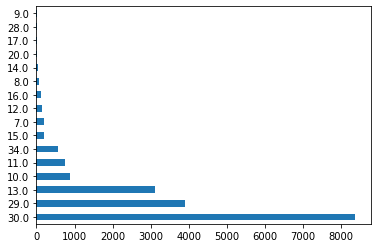

In [14]:
alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 4].value_counts().plot(kind='barh')

In [15]:
print(np.sort(alerts_df['alert_subtype_id'].unique()))

[ 1.  2.  3.  4.  5.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 20. 28.
 29. 30. 31. 32. 33. 34. nan]


In [16]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 2].unique()))

[ 1.  2. nan]


In [17]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 3].unique()))

[ 3.  4.  5. nan]


In [18]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 4].unique()))

[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 20. 28. 29. 30. 34. nan]


In [19]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 7].unique()))

[31. 32. 33. nan]


I have to assume that 'alert_type_id' is 3 (JAM) and 'alert_subtype_id' 4 is JAM_HEAVY_TRAFFIC and 5 is JAM_STAND_STILL_TRAFFIC

In [20]:
alerts_df['street'].unique().shape

(3410,)

In [21]:
alerts_df = alerts_df.set_index('publish_date_dt').sort_index()

In [22]:
alerts_df.head(2)

,alert_subtype_id,alert_type_id,street
publish_date_dt,,,
2016-08-06 17:55:23+00:00,7.0,4,Alberto Llona
2017-01-14 15:01:37+00:00,7.0,4,Manuel Antonio Matta


In [24]:
alerts_df[alerts_df['street'] == 'Ruta 79'].alert_subtype_id.rolling('5T').apply(list)

C:\Users\nvillalobos\AppData\Local\Continuum\miniconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


TypeError: must be real number, not list

In [26]:
alerts_df_jams = alerts_df[(alerts_df['alert_type_id'] == 3) & ((alerts_df['alert_subtype_id'] == 4) | (alerts_df['alert_subtype_id'] == 5))]

In [27]:
alerts_df_jams.head()

,alert_subtype_id,alert_type_id,street,publish_date_dt
1,4.0,3,Av. Dorsal,2018-04-01 02:30:58+00:00
9,4.0,3,Av. Teniente Luis Cruz Martínez,2018-04-01 02:38:08+00:00
14,4.0,3,Av. Américo Vespucio,2018-04-01 02:43:12+00:00
18,4.0,3,Av. La Florida,2018-04-01 02:45:24+00:00
22,4.0,3,Peaje Troncal Las Canteras,2018-04-01 02:49:27+00:00


In [23]:
alerts_df_jams = alerts_df_jams.set_index('publish_date_dt')

In [24]:
alerts_df_jams.head()

,alert_subtype_id,alert_type_id,street
publish_date_dt,,,
2018-04-01 02:30:58+00:00,4.0,3,Av. Dorsal
2018-04-01 02:38:08+00:00,4.0,3,Av. Teniente Luis Cruz Martínez
2018-04-01 02:43:12+00:00,4.0,3,Av. Américo Vespucio
2018-04-01 02:45:24+00:00,4.0,3,Av. La Florida
2018-04-01 02:49:27+00:00,4.0,3,Peaje Troncal Las Canteras


In [ ]:
.apply(list)

In [ ]:
def rolling_to_list(x,df,time_window):
    return df[df['street'] == x['street']].rolling(time_window).alert_subtype_id.list()
    